In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utilidades import *

In [40]:
data = pd.read_csv("dados_tratados.csv")
data.head()

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24.0,58660.0,Outros,Ens.Médio,MuitoBom,58.0,0,Solteiro,VoyageRoamer,84623.0,350000.0,bom
1,Empresário,21.0,46557.0,Outros,Ens.Médio,MuitoBom,38.0,2,Víuvo,EcoPrestige,126855.0,500000.0,bom
2,Dentista,13.0,43939.0,Própria,Ens.Médio,Bom,23.0,0,Casado,DoubleDuty,127151.0,320000.0,ruim
3,Engenheiro,10.0,37262.0,Própria,Superior,Baixo,36.0,0,Divorciado,AgileXplorer,28767.0,250000.0,bom
4,Contador,6.0,52606.0,Própria,PósouMais,Justo,27.0,0,Casado,TrailConqueror,199564.0,400000.0,ruim


In [41]:
# Pré-tratamento da classe alvo
data["classe"] = data["classe"].astype("category")
data["classe"] = data["classe"].cat.codes
data.head(6)

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24.0,58660.0,Outros,Ens.Médio,MuitoBom,58.0,0,Solteiro,VoyageRoamer,84623.0,350000.0,0
1,Empresário,21.0,46557.0,Outros,Ens.Médio,MuitoBom,38.0,2,Víuvo,EcoPrestige,126855.0,500000.0,0
2,Dentista,13.0,43939.0,Própria,Ens.Médio,Bom,23.0,0,Casado,DoubleDuty,127151.0,320000.0,1
3,Engenheiro,10.0,37262.0,Própria,Superior,Baixo,36.0,0,Divorciado,AgileXplorer,28767.0,250000.0,0
4,Contador,6.0,52606.0,Própria,PósouMais,Justo,27.0,0,Casado,TrailConqueror,199564.0,400000.0,1
5,Arquiteto,37.0,55222.0,Alugada,Ens.Médio,MuitoBom,54.0,2,Víuvo,SpeedFury,271083.0,800000.0,0


In [42]:
data['Solicitado vs Total Bem'] = (data['valorsolicitado'] / data['valortotalbem']) *100
data.loc[data['Solicitado vs Total Bem']> 100, 'Solicitado vs Total Bem'] = 100
data['Renda vs ValorSolicitado'] = (data['renda'] / data['valorsolicitado']) *100
data.loc[data['Renda vs ValorSolicitado']> 100, 'Renda vs ValorSolicitado'] = 100
data['Estabilidade Profissional'] = (data['tempoprofissao'] / data['idade'])

In [43]:
global data

In [44]:
data.loc[data['Solicitado vs Total Bem']> 100]

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,produto,valorsolicitado,valortotalbem,classe,Solicitado vs Total Bem,Renda vs ValorSolicitado,Estabilidade Profissional


In [45]:
data.head(5)

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,produto,valorsolicitado,valortotalbem,classe,Solicitado vs Total Bem,Renda vs ValorSolicitado,Estabilidade Profissional
0,Cientista de Dados,24.0,58660.0,Outros,Ens.Médio,MuitoBom,58.0,0,Solteiro,VoyageRoamer,84623.0,350000.0,0,24.178000,69.319216,0.413793
1,Empresário,21.0,46557.0,Outros,Ens.Médio,MuitoBom,38.0,2,Víuvo,EcoPrestige,126855.0,500000.0,0,25.371000,36.700958,0.552632
2,Dentista,13.0,43939.0,Própria,Ens.Médio,Bom,23.0,0,Casado,DoubleDuty,127151.0,320000.0,1,39.734687,34.556551,0.565217
3,Engenheiro,10.0,37262.0,Própria,Superior,Baixo,36.0,0,Divorciado,AgileXplorer,28767.0,250000.0,0,11.506800,100.000000,0.277778
4,Contador,6.0,52606.0,Própria,PósouMais,Justo,27.0,0,Casado,TrailConqueror,199564.0,400000.0,1,49.891000,26.360466,0.222222


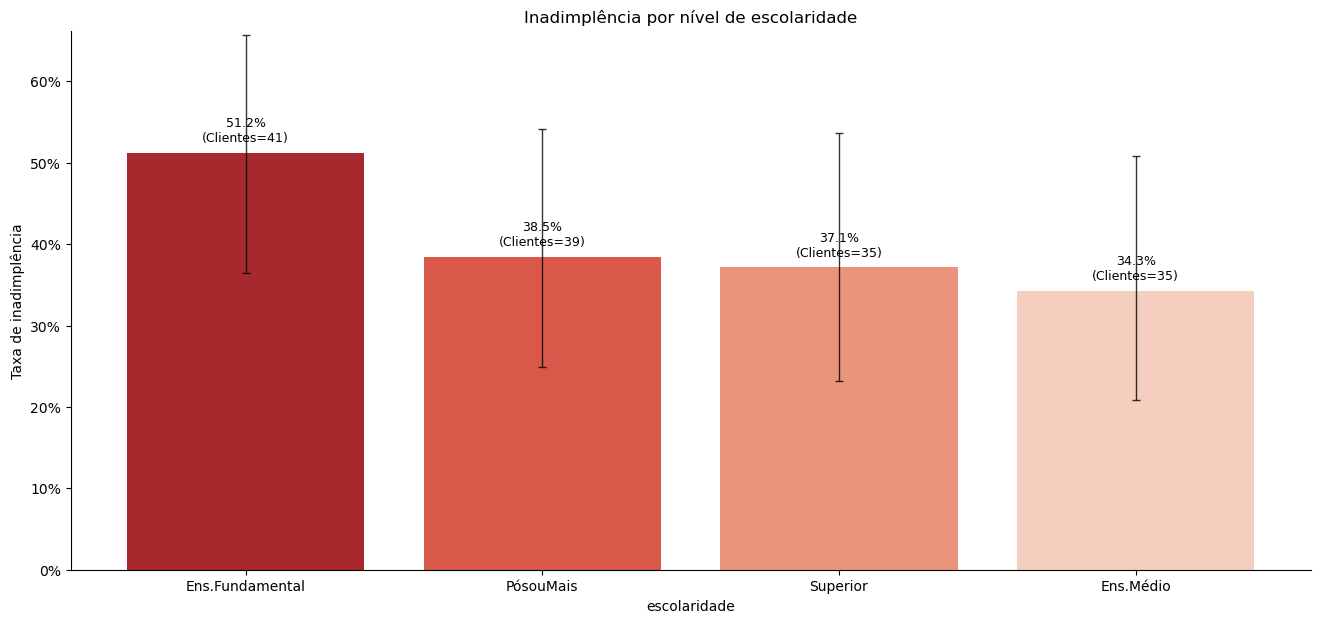

In [46]:
ax, resumo, _ = plot_rate_by_group(
    df=data,
    target="classe",
    group="escolaridade",    
    bin_strategy="quantile",
    min_count=20, figsize=(16,7),
    sort_by="rate",
    ascending=False,
    title="Inadimplência por nível de escolaridade",
    show_ci=True
)
plt.show()

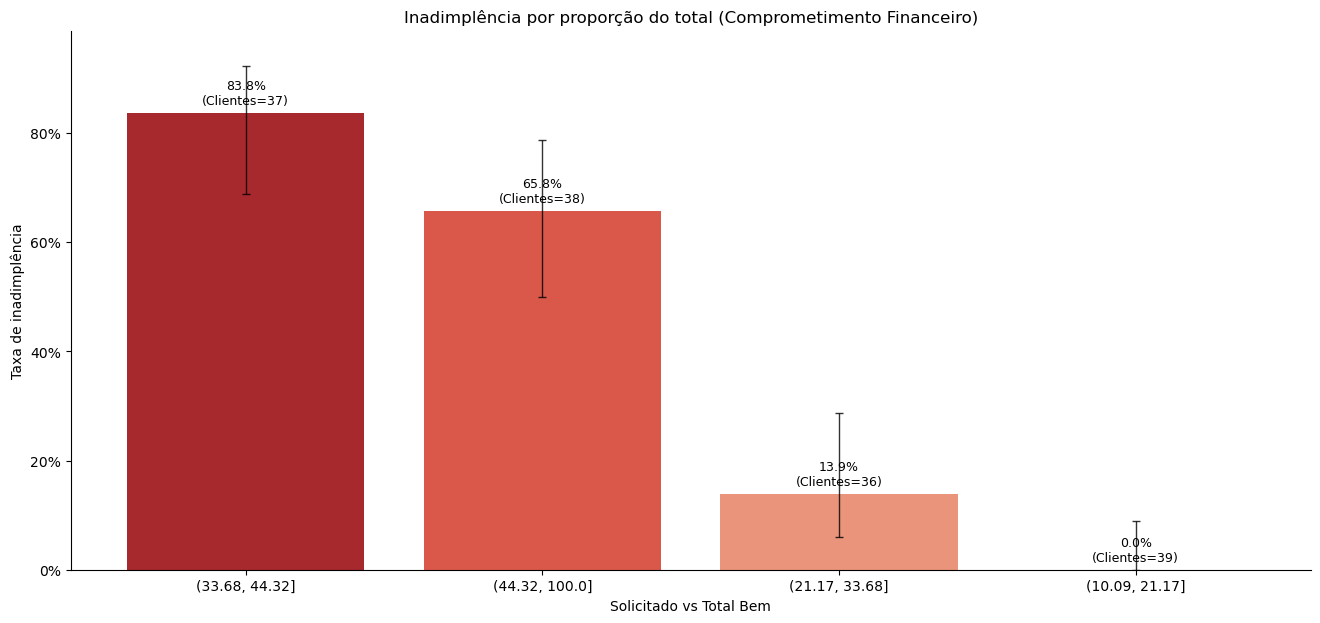

In [47]:
ax, resumo, _ = plot_rate_by_group(
    df=data,
    target="classe",
    group="Solicitado vs Total Bem",
    bins=4, figsize=(16,7),
    bin_strategy="quantile",
    min_count=30,
    sort_by="rate",
    ascending=False,
    title="Inadimplência por proporção do total (Comprometimento Financeiro)",
    show_ci=True
)
plt.show()


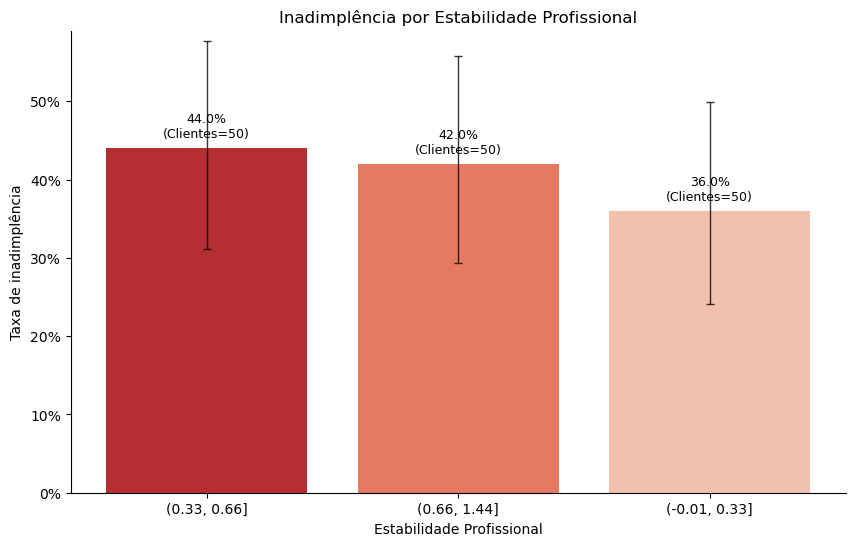

In [48]:
ax, resumo, _ = plot_rate_by_group(
    df=data,
    target="classe",
    group="Estabilidade Profissional",
    bins=3,
    bin_strategy="quantile",
    min_count=30,
    sort_by="rate",
    ascending=False,
    title="Inadimplência por Estabilidade Profissional",
    show_ci=True
)
plt.show()

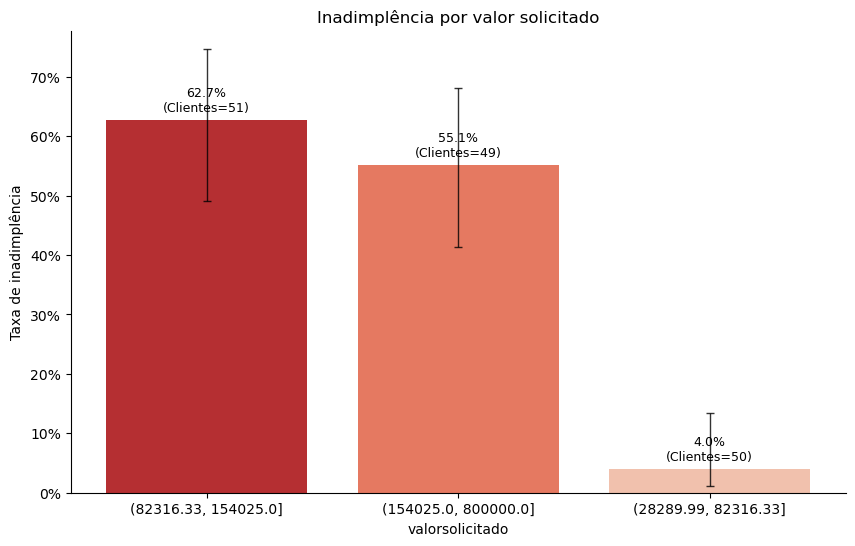

In [49]:
ax, resumo, _ = plot_rate_by_group(
    df=data,
    target="classe",
    group="valorsolicitado",
    bin_strategy="quantile",
    bins=3,
    min_count=30,
    sort_by="rate",
    ascending=False,
    title="Inadimplência por valor solicitado",
    show_ci=True
)
plt.show()

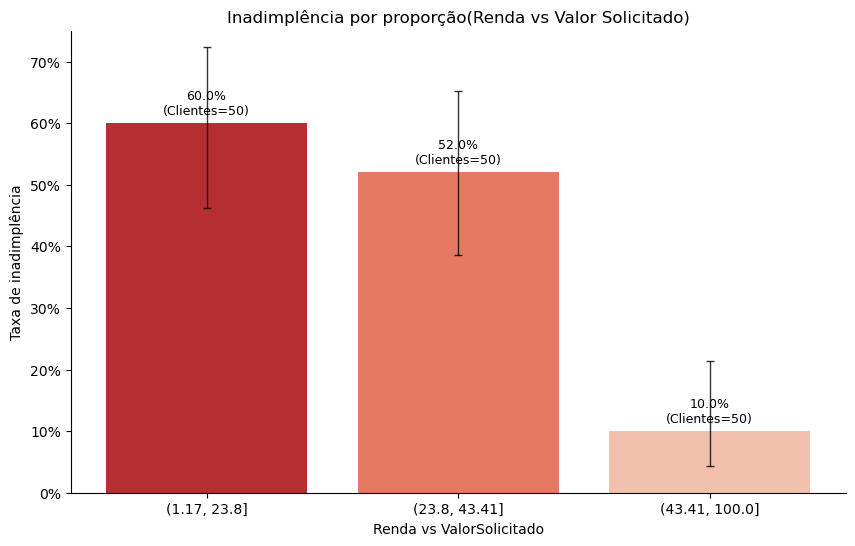

In [50]:
ax, resumo, _ = plot_rate_by_group(
    df=data,
    target="classe",
    group="Renda vs ValorSolicitado",
    bin_strategy="quantile",
    bins=3,
    min_count=30,
    sort_by="rate",
    ascending=False,
    title="Inadimplência por proporção(Renda vs Valor Solicitado)",
    show_ci=True
)
plt.show()

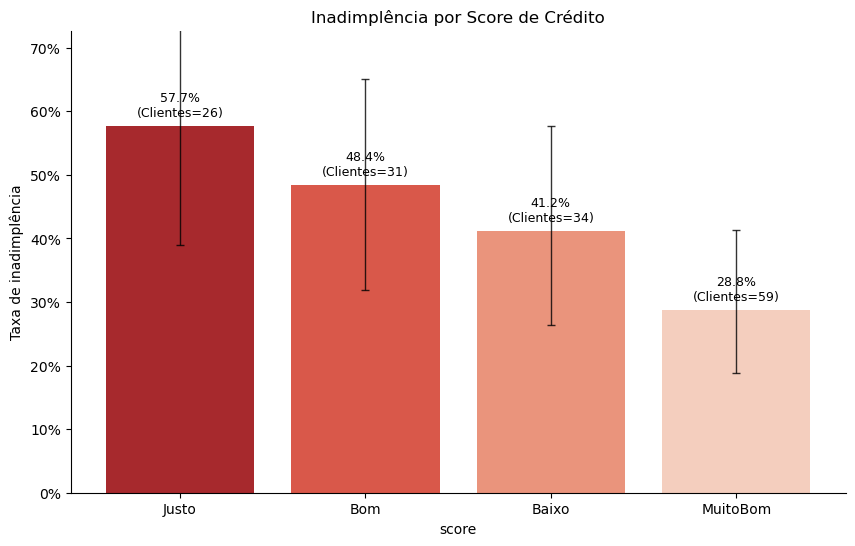

In [51]:
ax, resumo, _ = plot_rate_by_group(
    df=data,
    target="classe",
    group="score",
    bin_strategy="quantile",    
    min_count=25,
    sort_by="rate",
    ascending=False,
    title="Inadimplência por Score de Crédito",
    show_ci=True
)
plt.show()

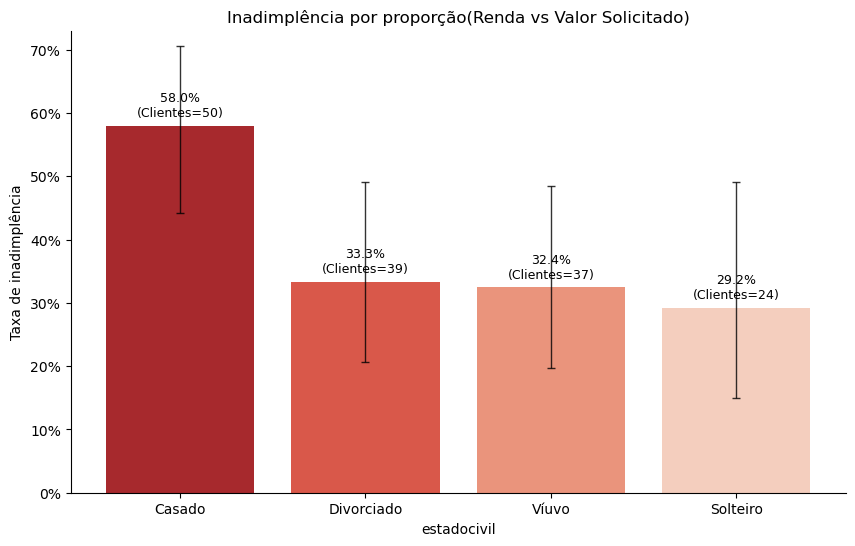

In [52]:
ax, resumo, _ = plot_rate_by_group(
    df=data,
    target="classe",
    group="estadocivil",
    bin_strategy="quantile",    
    min_count=20,
    sort_by="rate",
    ascending=False,
    title="Inadimplência por proporção(Renda vs Valor Solicitado)",
    show_ci=True
)
plt.show()

In [53]:
data.drop(columns=['tiporesidencia', "tempoprofissao", "escolaridade", "dependentes", "valortotalbem", "score", "produto", "idade", "Estabilidade Profissional"], inplace=True)

In [54]:
data.rename(columns={"profissao": "Profissão", "renda": "Renda","estadocivil": "Estado Civil", "produto": "Produto",
                    "idade": "Idade", "valorsolicitado": "Valor Solicitado"}, inplace=True)
data.tail()

,Profissão,Renda,Estado Civil,Valor Solicitado,classe,Solicitado vs Total Bem,Renda vs ValorSolicitado
145,Médico,47480.0,Divorciado,217011.0,0,27.126375,21.879075
146,Advogado,20860.0,Víuvo,139244.0,1,43.513750,14.980897
147,Arquiteto,31394.0,Divorciado,107035.0,1,35.678333,29.330593
148,Médico,39769.0,Solteiro,54520.0,0,15.577143,72.943874
149,Advogado,53763.0,Divorciado,34790.0,0,10.871875,100.000000


In [55]:
data.to_csv("dados_segment.csv", index=False)

In [56]:
print("Colunas que serão utilizadas na análise segmentada ------------> %s " % data.columns.drop("classe").values)

Colunas que serão utilizadas na análise segmentada ------------> ['Profissão' 'Renda' 'Estado Civil' 'Valor Solicitado'
 'Solicitado vs Total Bem' 'Renda vs ValorSolicitado'] 
